In [43]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
fact_df = pd.read_csv('data/fact_table.csv', encoding='ISO-8859-1')
customer_df = pd.read_csv('data/customer_dim.csv', encoding='ISO-8859-1')
item_df = pd.read_csv('data/item_dim.csv', encoding='ISO-8859-1')
store_df = pd.read_csv('data/store_dim.csv', encoding='ISO-8859-1')
time_df = pd.read_csv('data/time_dim.csv', encoding='ISO-8859-1')

In [72]:
df = (
    fact_df.merge(time_df, how='left', on='time_key')
    .merge(item_df, how='left', on='item_key')
    .merge(customer_df, how='left', on='coustomer_key')
    .merge(store_df, how='left', on='store_key')
)

In [73]:
def group_descs(desc):
    if 'beverage' in desc.lower():
        return 'Beverage'
    elif 'food' in desc.lower():
        return 'Food'
    elif 'coffee' in desc.lower():
        return 'Coffee'
    elif 'dishware' in desc.lower():
        return 'Dishware'
    elif 'gum' in desc.lower():
        return 'Gum'
    else:
        return desc

df['item_type'] = df['desc'].apply(group_descs)

In [74]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df['minute'] = df['date'].dt.minute
df['date'] = pd.to_datetime(df['date'].dt.date)

In [75]:
df.describe()

,quantity,unit_price_x,total_price,date,hour,day,month,year,unit_price_y,contact_no,nid,minute
count,1000000.000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,6.000185,17.561602,105.401436,2017-07-20 04:55:20.035199232,11.542591,15.77572,6.518765,2017.050811,17.561602,8.801753e+12,5.482455e+12,29.440809
min,1.000000,6.000000,6.000000,2014-01-20 00:00:00,0.000000,1.00000,1.000000,2014.000000,6.000000,8.801510e+12,1.000824e+12,0.000000
25%,3.000000,13.000000,47.250000,2015-10-17 00:00:00,6.000000,8.00000,4.000000,2015.000000,13.000000,8.801631e+12,3.171991e+12,14.000000
50%,6.000000,16.000000,90.000000,2017-07-20 00:00:00,12.000000,16.00000,7.000000,2017.000000,16.000000,8.801752e+12,5.468886e+12,29.000000
75%,9.000000,20.000000,144.000000,2019-04-19 00:00:00,18.000000,23.00000,10.000000,2019.000000,20.000000,8.801877e+12,7.781670e+12,45.000000
max,11.000000,55.000000,605.000000,2021-01-23 00:00:00,23.000000,31.00000,12.000000,2021.000000,55.000000,8.802000e+12,9.998930e+12,59.000000
std,3.161932,8.637097,80.829301,NaN,6.903028,8.80161,3.447577,2.016437,8.637097,1.440965e+08,2.624283e+12,17.337339


In [76]:
def plot_monthly_revenue(year):
    df_year = df[df['year'] == year]
    monthly_revenue = df_year.groupby('month')['total_price'].sum()
    monthly_revenue.plot(kind='line', marker='o')
    plt.title(f'Monthly Total Revenue in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

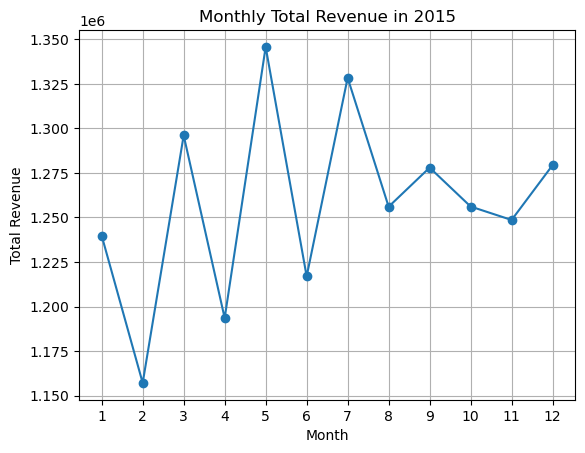

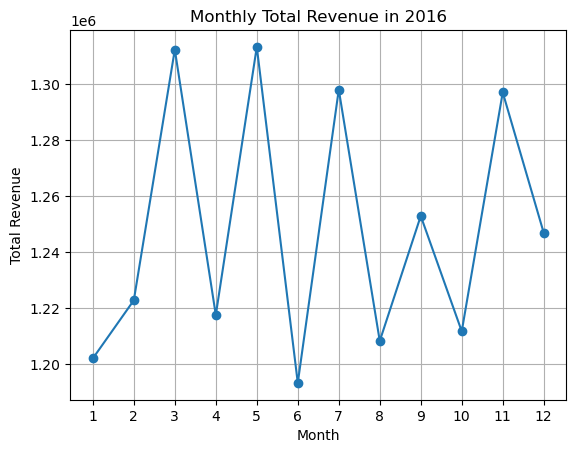

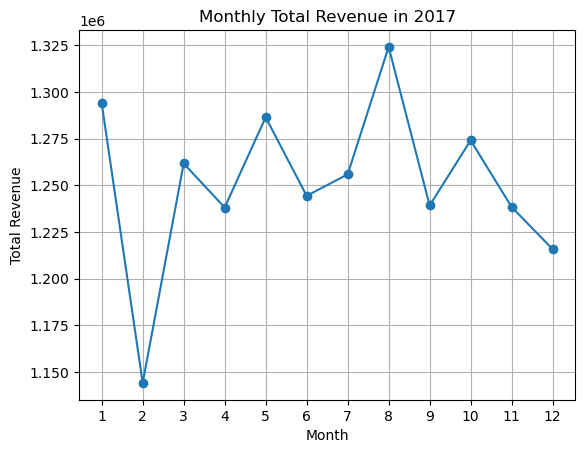

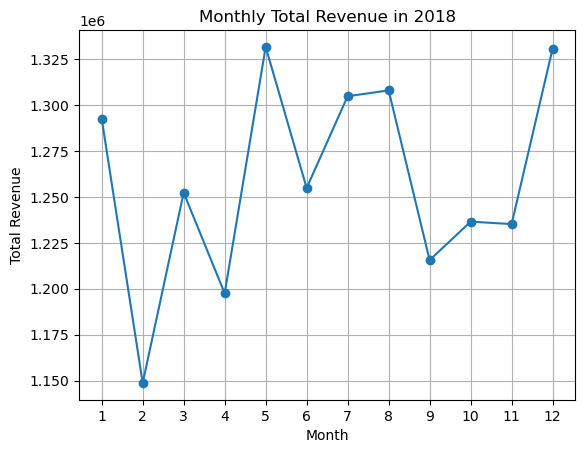

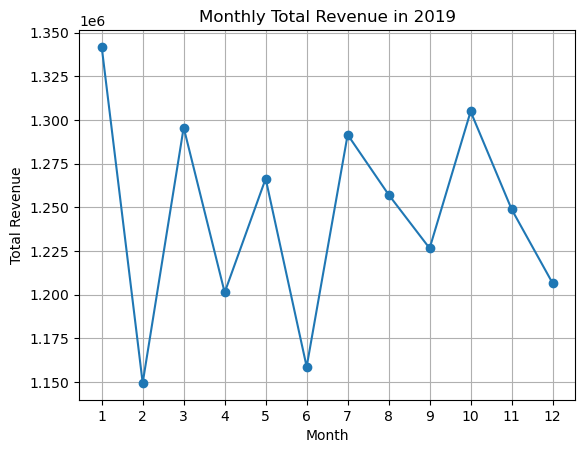

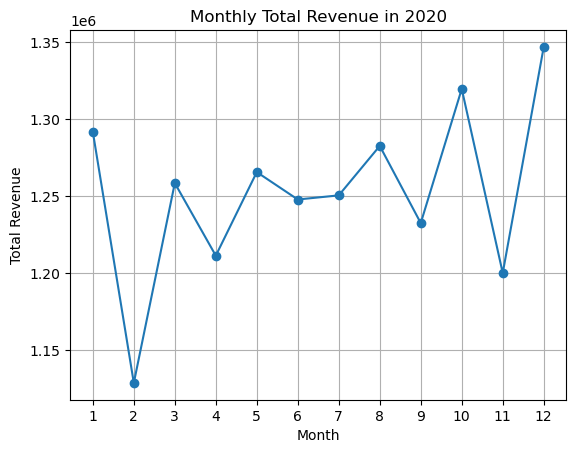

In [77]:
for year in [2015, 2016, 2017, 2018, 2019, 2020]:
    plot_monthly_revenue(year)

In [78]:
def plot_monthly_revenue_by_item(year, figsize):
    df_year = df[df['year'] == year]
    monthly_revenue_by_item_type = df_year.groupby(['month', 'item_type'])['total_price'].sum().unstack(fill_value=0)
    monthly_revenue_by_item_type.plot(kind='line', marker='o', figsize=figsize)
    plt.title(f'Monthly Total Revenue in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.xticks(range(1, 13))
    plt.legend(title='Item Type', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

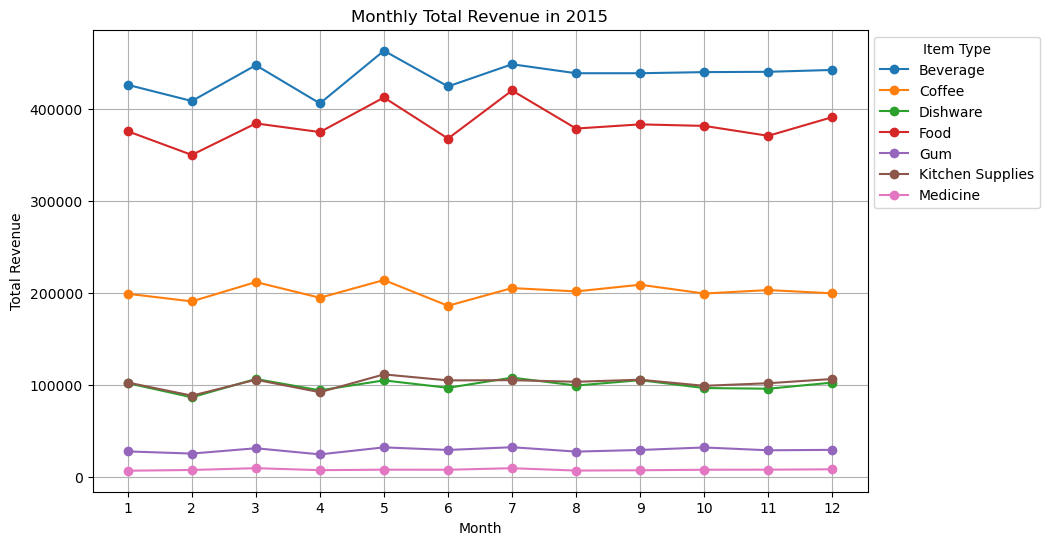

In [79]:
plot_monthly_revenue_by_item(2015, (10, 6))

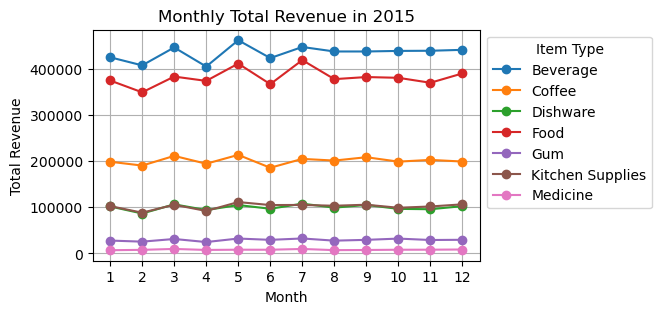

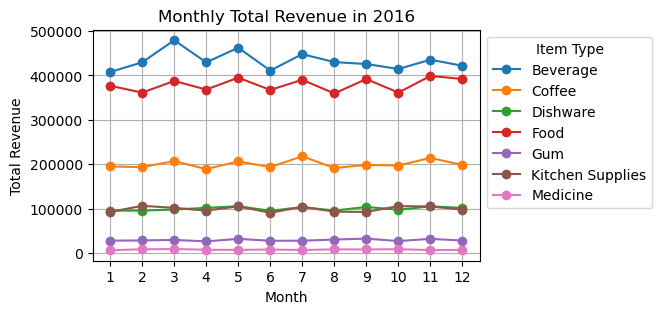

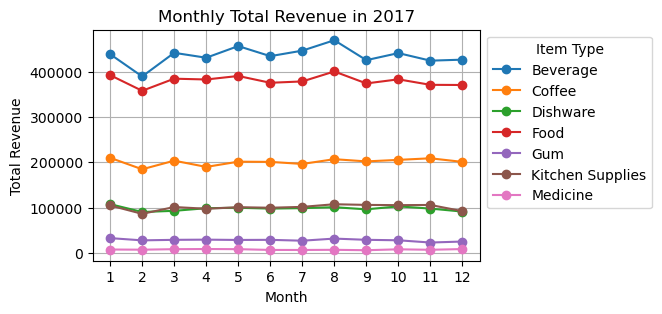

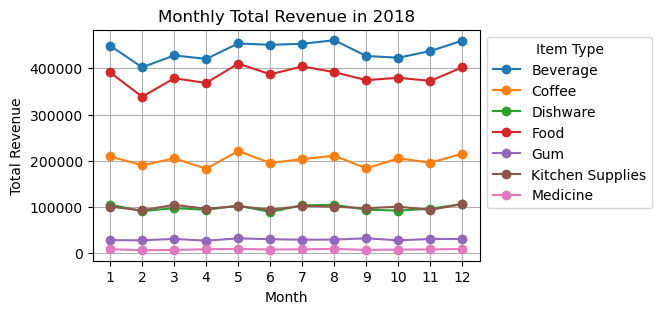

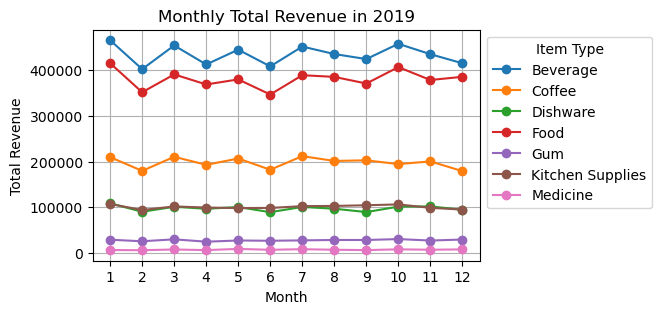

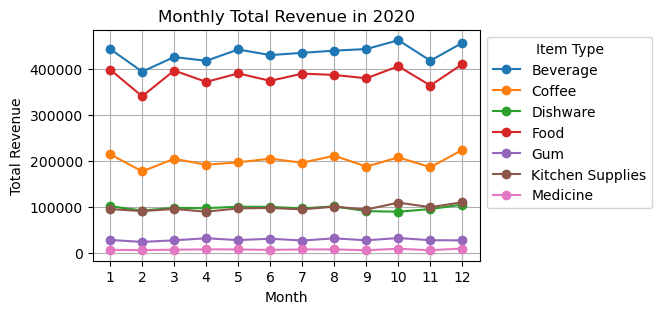

In [80]:
for year in [2015, 2016, 2017, 2018, 2019, 2020]:
    plot_monthly_revenue_by_item(year, (5, 3))

In [86]:
def plot_monthly_revenue_by_division(year, figsize):
    df_year = df[df['year'] == year]
    monthly_revenue_by_item_type = df_year.groupby(['month', 'division'])['total_price'].sum().unstack(fill_value=0)
    monthly_revenue_by_item_type.plot(kind='line', marker='o', figsize=figsize)
    plt.title(f'Monthly Total Revenue in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.xticks(range(1, 13))
    plt.legend(title='Division', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

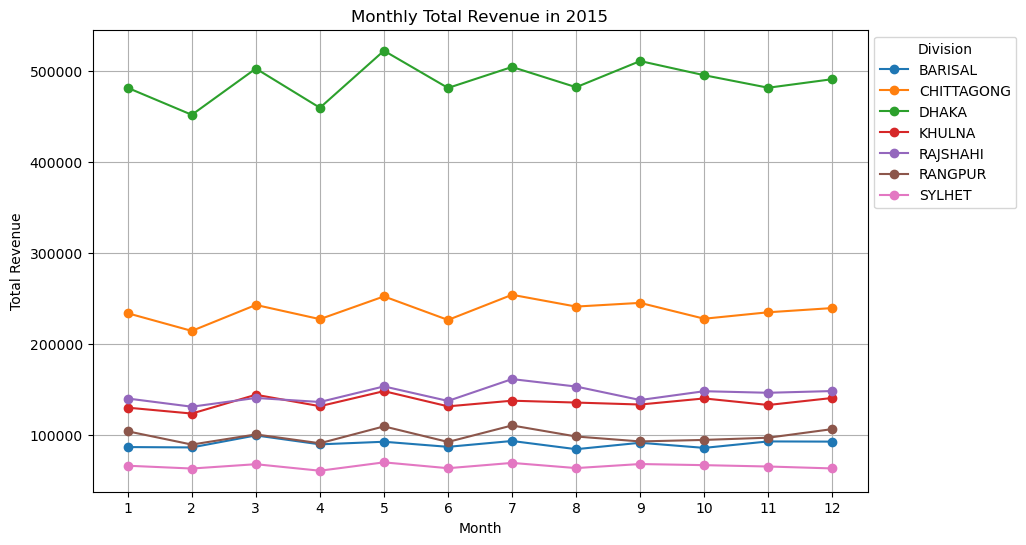

In [87]:
plot_monthly_revenue_by_division(2015, (10, 6))